## Assignment 04b: Sleeping habits

As a data scientist you will work with ordinal or categorical data as well. What are good methods to visualize such data? What are proper statistics to use? What needs to be done in the data preparation steps to conduct certain analysis. During this week we will work with data from a sleeping study. This dataset is not mandatory. You are encouraged to use data from your project when possible. 

Keywords: statistics, categorical data, ordinal data, survey-based study of the sleeping, exploratory data analysis, normalization, hypothesis testing, p-value


More to read:
- https://fennaf.gitbook.io/bfvm22prog1/

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
There are a number of cheatsheets and tutorials on the internet. The next overview is a compact overview of tutorials
- https://www.kaggle.com/hamelg/python-for-data-21-descriptive-statistics
- https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions
- https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals
- https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
- https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
- https://www.kaggle.com/hamelg/python-for-data-26-anova/notebook
- https://www.kaggle.com/hamelg/python-for-data-27-linear-regression


You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. 

Learning objectives
- Conduct exploratory data analysis for categarical data
- Provide statistical evidence of factor effect
- Maintain development environment 
- Apply coding standards and FAIR principles

Please add topics you want to learn here: https://padlet.com/ffeenstra1/z9duo25d39dcgezz


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 

If your data is not normally distributed you might want to look for an alternative. See also https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. 
Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [91]:
import pandas as pd
import yaml
import numpy as np

#open the config yaml
def open_load_config(config_file, name_import):
    """
    Loading data from a yaml config file, returning a dataframe with imported (csv) data.

    param: 
        input: config_file(.yaml)
               name_import(name of the desired item)

        output: dataframe(pandas.read_csv())
    """
    try :
        with open(file="config.yaml", mode='r') as conf_file:
            config = yaml.safe_load(conf_file)
            output_df = pd.read_csv(config[name_import])
    except:
        print("file not properly loaded:\n")
        raise OSError
    return output_df

sleep_df = open_load_config("config.yaml","sleep")

#code printing percentage missing data
#- by using regex, empty values are converted to np.NaN
sleep_df = sleep_df.replace(r'\s+', np.nan, regex=True)
#- secondly the percentage of missing values are calculated by dividing the dataframes
#  df.isna() by the dataframe df.notna() * 100% 
print(f'Missing(%): \n{100*(sleep_df.isna().sum() / sleep_df.notna().sum())}')

#show the sleep dataframe
sleep_df.head()


Missing(%): 
Enough        0.000000
Hours         1.960784
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64


,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [92]:
#code printing answer dependent and independent variables
print(
    f"Independent: tiredness and breakfast\n"
    f"Dependent: hours sleep"
    )

Independent: tiredness and breakfast
Dependent: hours sleep


In [93]:
#code printing answer about datatypes
print("The different datatypes are:")
sleep_df.dtypes

The different datatypes are:


Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object

---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

Number of people having no breakfast: 41
Number of people having breakfast: 63
Having breakfast: 
mean = 6.918032786885246


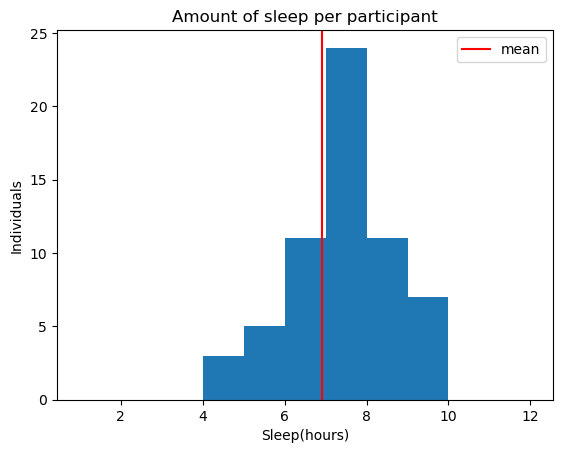

Having no breakfast: 
mean = 6.2682926829268295


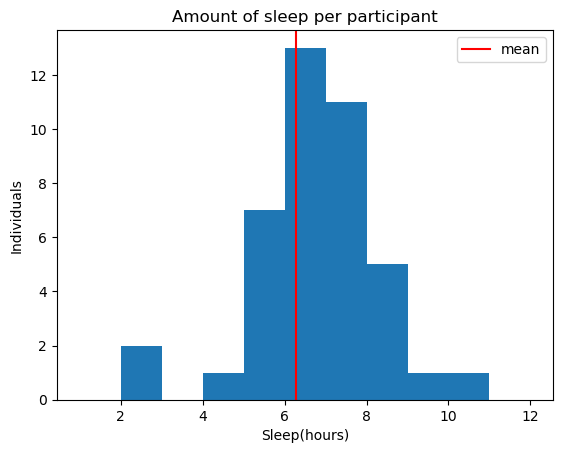

In [100]:
#code your answer to the value counts and distribution plots here
import matplotlib.pyplot as plt

def hist_plot_avg(data):
    """
    function returns a histogram with an mean line

    param:
        input: data(df.x_values)

        output: plot(matplotlib.pyplot.hist())
    """
    y = np.mean(data)
    print(f'mean = {y}')
    plt.hist(x=data,bins=[1,2,3,4,5,6,7,8,9,10,11,12])
    plt.axvline(x=y, color='r',label="mean")
    plt.xlabel("Sleep(hours)")
    plt.ylabel("Individuals")
    plt.title("Amount of sleep per participant")
    plt.legend(loc="best")
    plt.show()

breakfast = sleep_df.Hours[sleep_df.Breakfast == "Yes"]
no_breakfast = sleep_df.Hours[sleep_df.Breakfast == "No"]

print(f'Number of people having no breakfast: {len(no_breakfast)}\n'
    f'Number of people having breakfast: {len(breakfast)}')


print("Having breakfast: ")
hist_plot_avg(breakfast)
print("Having no breakfast: ")
hist_plot_avg(no_breakfast)



Breakfast: 
Estimation method: ML
mu = 6.918, sigma = 1.269


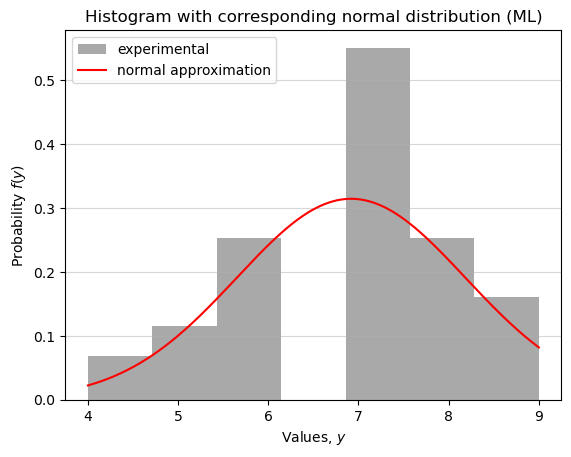

Estimation method: ML
n = 63, mu = 6.918, sigma = 1.269
Expected number of data outside CI: 3


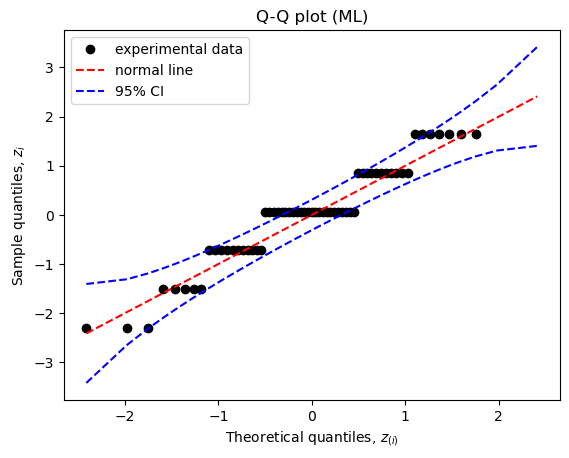

No breakfast: 
Estimation method: ML
mu = 6.268, sigma = 1.55


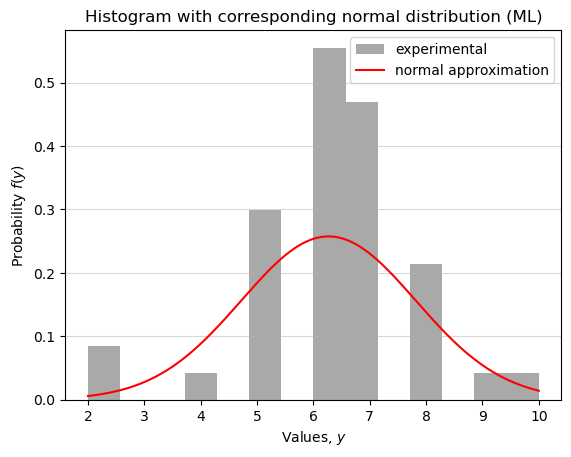

Estimation method: ML
n = 41, mu = 6.268, sigma = 1.55
Expected number of data outside CI: 2


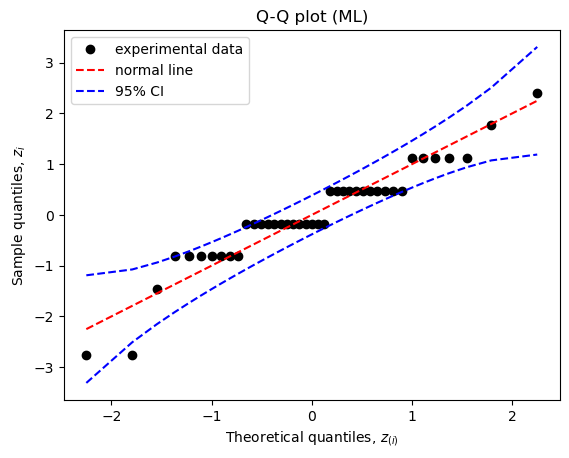

In [95]:
#looks normally distibuted. Check with the code provided in the DS1 course. 
from Summary_functions_and_code_clean_v11 import DS_Q_Q_Hist, DS_Q_Q_Plot

print("Breakfast: ")
DS_Q_Q_Hist(breakfast, est="ML")
DS_Q_Q_Plot(breakfast, est="ML")
print("No breakfast: ")
DS_Q_Q_Hist(no_breakfast, est="ML")
DS_Q_Q_Plot(no_breakfast, est="ML")

----------------------------------------------------------------

The data looks normally distributed, although it looks like the data is in hourly 'bins'
As people usually do not sleep whole hours, in the real world this data would be more dispersed.
So using the ANOVA test would be a possibility. 

-----------------------------------------------------------------

breakfast: 


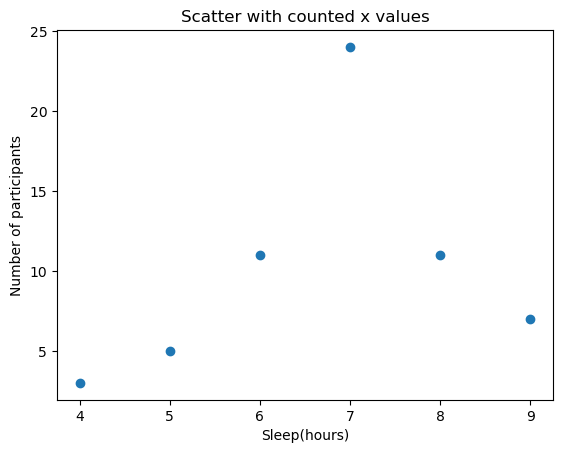

No breakfast: 


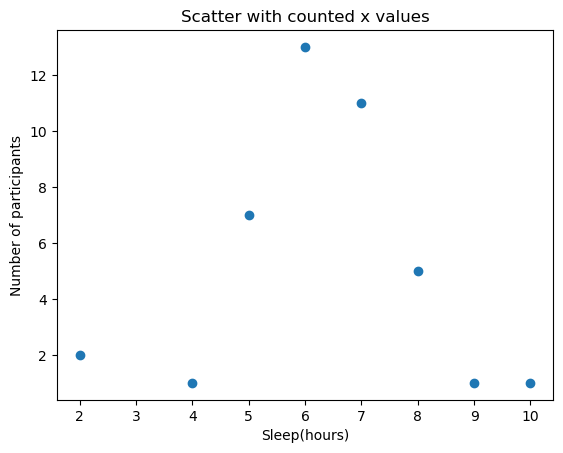

In [96]:
#code for the scatter plot here

def plot_count(data):
    """
    Function that counts the x values of the input data, and stores these as y values
    ulitmately plotting the unique x values with the corresponding y values(counts) 

    param:
        input: data(np.array): unorganized x values

        output: scatterplot(matplotlib.pyplot.scatter())
    """
    x_y_values = {x:len([i for i in data if i == x]) for x in np.unique(data)}
    x,y = x_y_values.keys(),x_y_values.values()
    plt.scatter(x,y)
    plt.title('Scatter with counted x values')
    plt.xlabel("Sleep(hours)")
    plt.ylabel("Number of participants")
    plt.show()

print("breakfast: ")
plot_count(breakfast)
print("No breakfast: ")
plot_count(no_breakfast)

In [125]:
#code your answer to the target statistics here
#melting both the breakfast and no_breakfast Dataframes
test_df = breakfast
test_df = test_df.rename("breakfast")
test_df["no_breakfast"] = no_breakfast
test_df.head()


AttributeError: 'Series' object has no attribute 'Columns'

In [ ]:
import seaborn as sns

ax = sns.boxplot(x='treatments', y='value', data=no_breakfast, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=no_breakfast, color='#7d0013')

ValueError: Could not interpret input 'treatments'

In [ ]:
#code your answer for the heatmap here and briefly state your finding

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [ ]:
# your code to plot here

In [ ]:
# briefly summarize your findings

<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [ ]:
# your code to plot here

In [ ]:
# your code for the statistical test here

In [ ]:
# briefly summarize your findings

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [ ]:
#your solution here

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [ ]:
#Your solution here

---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [ ]:
#your solution here